# Fundamentals of Data Visualization Final Project

Welcome to my final project on fundamentals of data visualization. In order to increase the user interface and client ease of use, I decided to use Dash in conjunction with Plotly for my project.


### Packages:

In [1]:
%pip install jupyter-dash

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 29.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [2]:
import altair as alt
import pandas as pd
import plotly as plt
from jupyter_dash import JupyterDash
import dash
from dash import dcc
from dash import html
import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output

This section simply informs you of your current working directory. Verify that WineData.csv is located in this directory.

In [3]:
%pwd

'/content'

## Project Overview

## Interactive Wine Data Visualization Dashboard


The application is divided into three main tasks:

### Task One: Understand Property Distributions
This tab allows users to explore the distribution of various wine attributes using either violin plots or histograms. You can select different attributes from a dropdown menu to see how they are distributed across different types of wine.


### Task Two: Understand Correlation between Physical Attributes

This tab features two main visualizations:

- **Scatterplot Matrix (Splom):** A comprehensive scatterplot matrix showing the relationships between all physical attributes in the dataset. This matrix helps identify potential correlations between attributes.

- **Attribute vs. Attribute Scatterplot:** An interactive scatterplot where users can select two physical attributes to examine their relationship. Users can also filter the data by wine type and view the scatterplot with linear regression models.


### Task Three: Understand Correlation between Physical Attributes and Quality
In this tab, users can explore the correlation between a selected physical attribute and the quality of the wine. This section includes:

- **Scatterplot with Regression Line:** Displays how a chosen attribute relates to wine quality. The plot includes regression lines to show trends and the correlation strength.
- **Violin Plot and Histogram:** Optional additional visualizations to represent the distribution of the chosen attribute against wine quality.

The Red and White wine datasets were combined into one termed "WineData" using R. All I did was call full_join() from reader after naming the wine variety. The R code is going to be in a footnote.

In [4]:
WineData = pd.read_csv("WineData.csv").sort_values(by = "quality", ascending = False)
WineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,White
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,White
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,White
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,White
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,White


This code generates a scatterplot matrix (splom) using the Plotly library. The splom is created based on the dimensions provided in the 'dims' list. The 'index_vals' variable is used to determine the color of the markers in the splom. The 'fixColors' function is used to convert the numerical values in 'index_vals' to corresponding colors. The resulting splom is customized with layout settings such as width, height, plot background color, paper background color, and font color. The x and y axes are also updated to have a range mode of 'tozero'.

In [5]:
%%capture

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
dims = [dict(label = names[i], values = WineData[names[i]]) for i in range(len(names))]
index_vals = WineData['Type'].astype('category').cat.codes

def fixColors(input):
    for i in range(len(input)):
        if input[i] == 1:
            input[i] = "white"
        else:
            input[i] = "#d62728"
    return(input)

newVals = fixColors(index_vals)

splom = go.Figure(data=go.Splom(
                dimensions= dims,
                showupperhalf=False,
                opacity = 0.4,
                marker=dict(color= newVals,
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0.5)
                ))

splom.update_layout(
    width = 1750,
    height = 1750,
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text'])

splom.update_xaxes(rangemode="tozero")
splom.update_yaxes(rangemode="tozero")

This code defines a JupyterDash application with three tabs, each representing a different task related to data visualization.

- The first tab, "Task One", displays a violin plot or histogram based on the selected attribute from a dropdown menu. The plot shows the distribution of the selected attribute for different wine types. The user can interact with the plot using options in the upper right corner.
- The second tab, "Task Two", displays a scatterplot matrix and a scatterplot with linear regression models. The scatterplot matrix shows the relationship between each physical attribute in the dataset. The scatterplot allows the user to choose two physical attributes and optionally filter by wine type. The scatterplot also includes a zoom function.
- The third tab, "Task Three", displays a scatterplot with a violin plot and histogram for the selected attribute against the quality of the wine. The user can choose the attribute and filter by wine type.
- The code includes callback functions that update the plots based on user interactions with dropdown menus.

```Note: The code assumes the existence of a variable named "WineData" that contains the dataset used for visualization.```


In [7]:
app = JupyterDash(__name__)

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[

    dcc.Tabs([

        dcc.Tab(label='Task One', children=[

            html.H1(
                children='Task One: Understand Property Distributions',
                style={'textAlign': 'center','color': colors['text']}),

            html.Div(
                children='Please select an attribute you would like to know the distribution of below. Interaction options are in the upper right of the plot.',
                style={'textAlign': 'center','color': colors['text']}),

            dcc.Graph(id='Violin_Plot'),

            dcc.Dropdown(
                id='Violin_Dropdown',
                options=[
                    {'label': 'Fixed Acidity', 'value': 'fixed acidity'},
                    {'label': 'Volatile Acidity', 'value': 'volatile acidity'},
                    {'label': 'Citric Acid', 'value': 'citric acid'},
                    {'label': 'Residual Sugar', 'value': 'residual sugar'},
                    {'label': 'Chlorides', 'value': 'chlorides'},
                    {'label': 'Free Sulfur Dioxide', 'value': 'free sulfur dioxide'},
                    {'label': 'Total Sulfur Dioxide', 'value': 'total sulfur dioxide'},
                    {'label': 'Density', 'value': 'density'},
                    {'label': 'pH', 'value': 'pH'},
                    {'label': 'Sulphates', 'value': 'sulphates'},
                    {'label': 'Alcohol', 'value': 'alcohol'},
                    {'label': 'Quality', 'value': 'quality'}
                ],
                value = "fixed acidity",
                placeholder = "Select a variable for the x - axis"),

            html.Br()

        ]),

        dcc.Tab(label='Task Two', children=[

            html.H1(
                children = "Task Two: Understand Correlation between Physical Attributes",
                style={'textAlign': 'center','color': colors['text']}
            ),

            html.Div(
                children = "This scatterplot matrix relates each physical attribute in the data with all others. Duplicate cells (upper right) are removed for clarity. Interaction options are in the upper right of the plot. Please scroll down to bottom of tab to explore individual relationships.",
                style={'textAlign': 'center','color': colors['text']}
            ),

            dcc.Graph(figure = splom),

            html.Br(),

            html.Div(
                children = "The below scatterplot serves as a zoom function, and provides a linear regression model for each wine type. Choose two physical attributes (and optionally filter by wine type).",
                style={'textAlign': 'center','color': colors['text']}
            ),

            dcc.Graph(id = "Task2_Scatterplot"),

            html.Br(),

            dcc.Dropdown(
                id = "Task2_Scatterplot_xaxis",
                options=[
                    {'label': 'Fixed Acidity', 'value': 'fixed acidity'},
                    {'label': 'Volatile Acidity', 'value': 'volatile acidity'},
                    {'label': 'Citric Acid', 'value': 'citric acid'},
                    {'label': 'Residual Sugar', 'value': 'residual sugar'},
                    {'label': 'Chlorides', 'value': 'chlorides'},
                    {'label': 'Free Sulfur Dioxide', 'value': 'free sulfur dioxide'},
                    {'label': 'Total Sulfur Dioxide', 'value': 'total sulfur dioxide'},
                    {'label': 'Density', 'value': 'density'},
                    {'label': 'pH', 'value': 'pH'},
                    {'label': 'Sulphates', 'value': 'sulphates'},
                    {'label': 'Alcohol', 'value': 'alcohol'},
                ],
                value = "fixed acidity",
                placeholder = "Select a variable for the x - axis"
            ),

            html.Br(),

            dcc.Dropdown(
                id = "Task2_Scatterplot_yaxis",
                options=[
                    {'label': 'Fixed Acidity', 'value': 'fixed acidity'},
                    {'label': 'Volatile Acidity', 'value': 'volatile acidity'},
                    {'label': 'Citric Acid', 'value': 'citric acid'},
                    {'label': 'Residual Sugar', 'value': 'residual sugar'},
                    {'label': 'Chlorides', 'value': 'chlorides'},
                    {'label': 'Free Sulfur Dioxide', 'value': 'free sulfur dioxide'},
                    {'label': 'Total Sulfur Dioxide', 'value': 'total sulfur dioxide'},
                    {'label': 'Density', 'value': 'density'},
                    {'label': 'pH', 'value': 'pH'},
                    {'label': 'Sulphates', 'value': 'sulphates'},
                    {'label': 'Alcohol', 'value': 'alcohol'},
                ],
                value = "fixed acidity",
                placeholder = "Select a variable for the y - axis"
            ),

            html.Br(),

            dcc.Dropdown(
                id = "Task2_Scatterplot_filter",
                options=[
                    {'label' : "White", 'value': 'White'},
                    {'label' : "Red", 'value': 'Red'},
                    {'label' : 'Both', 'value': 'both'}
                ],
                value = "both",
                placeholder = "Select the wine types you want included on the scatterplot"
            ),

            html.Br()

        ]),


        dcc.Tab(label='Task Three', children=[

            html.H1(
                children='Task Three: Understand Correlation between Physical Attribute and Quality',
                style={'textAlign': 'center','color': colors['text']}),

            html.Div(
                children='Please select an attribute which you want plotted against quality. Interaction options are in the upper right of the plot. Mouse over regression line for R^2.',
                style={'textAlign': 'center','color': colors['text']}),

            dcc.Graph(id = 'Quality_Corr_Plot'),

            html.Br(),

            dcc.Dropdown(
                id = 'Quality_Corr_Dropdown1',
                options=[
                    {'label': 'Fixed Acidity', 'value': 'fixed acidity'},
                    {'label': 'Volatile Acidity', 'value': 'volatile acidity'},
                    {'label': 'Citric Acid', 'value': 'citric acid'},
                    {'label': 'Residual Sugar', 'value': 'residual sugar'},
                    {'label': 'Chlorides', 'value': 'chlorides'},
                    {'label': 'Free Sulfur Dioxide', 'value': 'free sulfur dioxide'},
                    {'label': 'Total Sulfur Dioxide', 'value': 'total sulfur dioxide'},
                    {'label': 'Density', 'value': 'density'},
                    {'label': 'pH', 'value': 'pH'},
                    {'label': 'Sulphates', 'value': 'sulphates'},
                    {'label': 'Alcohol', 'value': 'alcohol'},
                ],
                value = "alcohol",
                placeholder = "Select a variable for the x - axis"),


            html.Br(),

            dcc.Dropdown(
                id = 'Quality_Corr_Dropdown2',
                options=[
                    {'label' : "White", 'value': 'White'},
                    {'label' : "Red", 'value': 'Red'},
                    {'label' : 'Both', 'value': 'both'}
                ],
                value = "both",
                placeholder = "Select the wine types you want included on the scatterplot"
            ),

            html.Br()

        ]),
    ])
    ])

#This callback updates the x-axis for Task 1, and determines whether to present a violin plot or histogram based on whether quality is selected.
@app.callback(
    Output('Violin_Plot', 'figure'),
    Input('Violin_Dropdown', 'value')

)
def changeViolinAxis(value):
    if value != "quality":
        fig = px.violin(WineData, x = value, color="Type",  color_discrete_sequence=["white", "#d62728"], box=True, hover_data=WineData.columns,
                    title="Probability Density")

        fig.update_layout(
            plot_bgcolor=colors['background'],
            paper_bgcolor=colors['background'],
            font_color=colors['text'],
            height = 750
        )

        fig.update_xaxes(rangemode="tozero")
        fig.update_yaxes(rangemode="tozero")


    else:
        fig = px.histogram(WineData, x = value, color = "Type", color_discrete_sequence=["white", "#d62728"], histnorm='probability density',
barmode = "overlay", opacity = 0.75, title = "Quality is represented with a histogram due to its discrete nature")

        fig.update_layout(
            plot_bgcolor=colors['background'],
            paper_bgcolor=colors['background'],
            font_color=colors['text'])

        fig.update_xaxes(rangemode="tozero")
        fig.update_yaxes(rangemode="tozero")

    return(fig)

#This callback updates the scatterplot (not splom) in Task 2. It also enables filtration by wine type.
@app.callback(
        Output("Task2_Scatterplot", "figure"),
        Input("Task2_Scatterplot_xaxis", "value"),
        Input("Task2_Scatterplot_yaxis", "value"),
        Input("Task2_Scatterplot_filter", "value"),
)
def changeAttributeVsAttributePlot(xaxis_var, yaxis_var, whichpoints):
    if whichpoints == "Red":
        df = WineData[WineData["Type"] == whichpoints]
        figure = px.scatter(df, x = xaxis_var, y = yaxis_var, color = "Type", color_discrete_sequence=["#d62728"],  trendline = "ols")

    elif whichpoints == "White":
        df = WineData[WineData["Type"] == whichpoints]
        figure = px.scatter(df, x = xaxis_var, y = yaxis_var, color = "Type", color_discrete_sequence=["white"],  trendline = "ols")

    else:
        figure = px.scatter(WineData, x = xaxis_var, y = yaxis_var, color = "Type", color_discrete_sequence=["white", "#d62728"],  trendline = "ols")

    figure.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text'],
        height = 1000,
        width = 1750
    )

    figure.update_traces(
        marker = dict(size=7),
        opacity = 0.4
    )

    figure.update_xaxes(rangemode="tozero")
    figure.update_yaxes(rangemode="tozero")

    return figure

#This callback updates the scatterplot in Task 3. It enables filtration by wine type and selection of x-axis variable
@app.callback(
        Output('Quality_Corr_Plot', 'figure'),
        Input('Quality_Corr_Dropdown1', 'value'),
        Input('Quality_Corr_Dropdown2', 'value')
)
def changeQualityCorrPlot(xaxis_var, whichpoints):

    if whichpoints == "Red":
        df = WineData[WineData["Type"] == whichpoints]
        figure = px.scatter(df, x = xaxis_var, y = "quality", color = "Type", color_discrete_sequence=["#d62728"], marginal_x='violin',  marginal_y='histogram', trendline = "ols")

    elif whichpoints == "White":
        df = WineData[WineData["Type"] == whichpoints]
        figure = px.scatter(df, x = xaxis_var, y = "quality", color = "Type", color_discrete_sequence=["white"],marginal_x='violin', marginal_y='histogram', trendline = "ols")

    else:
        figure = px.scatter(WineData, x = xaxis_var, y = "quality", color = "Type", color_discrete_sequence=["white", "#d62728"],marginal_x='violin',  marginal_y='histogram', trendline = "ols")

    figure.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text'],
        width = 1750,
        height = 1000
    )

    figure.update_traces(
        #marker = dict(size=7),
        opacity = 0.8
    )

    figure.update_xaxes(rangemode="tozero")
    figure.update_yaxes(rangemode="tozero")

    return figure

In [8]:
app.run_server()

Dash app running on:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Here is footnote containing R code I used to create WineData.



In [ ]:
#library(tidyverse)
# RedWineData <- read_csv("RedWineQualities.csv")
# WhiteWineData <- read.table("winequality-white.txt", nrows = 4899)
# names(WhiteWineData) <- as.character(WhiteWineData[1,])
# WhiteWineData <-  WhiteWineData[2:nrow(WhiteWineData), ]

# parse_column <- function(data, column_number){
#   parse_me <- data[ , column_number]
#   return(parse_number(parse_me))
# }

# parse_dataframe <- function(data){
#   n <- ncol(data)
#   for(i in 1:n){
#     data[, i] <- parse_column(data, i)
#   }
#   return(data)
# }

# WhiteWineData <- parse_dataframe(WhiteWineData)

# n.white <- nrow(WhiteWineData)
# n.red <- nrow(RedWineData)
# newwhitecol <- rep("White", n.white)
# newredcol <- rep("Red", n.red)

# WhiteWineData$Type <- newwhitecol
# RedWineData$Type <- newredcol

# WineData <- full_join(WhiteWineData, RedWineData)

### Citations:

#### Data

- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

- Available at: [@Elsevier](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub)



#### References:

- [Tidyverse Package In R](https://www.tidyverse.org/packages/)<br>
- [Plotly in python](https://plotly.com/python/)






#Final Project Question and answers:


**1) A brief recap of your data, goals, and tasks, focusing on those that most directly influence your design**

- Data Recap: The dataset used in my project is a combination of red and white wine data, with attributes such as acidity, residual sugar, alcohol content and overall quality ratings. The data provides a comprehensive look into the physicochemical properties of wines, which can be analyzed to understand their influence on wine quality. Having worked with manufacturing data in the past, I approached this project with a focus on creating an efficient, interactive dashboard that allows users to draw meaningful insights from the dataset.

- Goals: The primary goal of this project was to design an intuitive and user-friendly dashboard using Dash and Plotly, enabling users to visualize and explore the relationships between wine attributes and quality. I aimed to make the data accessible by allowing users to interactively filter attributes, wine types and compare correlations, focusing on attributes that contribute to higher-quality wine.

- Tasks:

    - Task One: Provide users with the ability to explore the distribution of individual wine attributes using violin plots or histograms. This helps in visualizing how attributes differ across red and white wines.

    - Task Two: Allow users to investigate correlations between physical attributes by providing a scatterplot matrix and detailed scatterplots for comparing two selected attributes.

    - Task Three: Analyze the relationship between physical attributes (such as alcohol content, acidity, etc.) and wine quality, offering scatterplots with regression lines to highlight trends.


**2) Screenshots of and/or a link to your visualization implementation (see below for additional guidance)**

- Implementation: The dashboard, built using JupyterDash and Plotly is divided into three main tasks, each offering interactive visualizations to explore the dataset comprehensively. The interactive components such as dropdowns and tabs allow users to switch between tasks and visualize different aspects of the data.
You can refer Python code file from same folder

- Screenshots:

    - Task One: Visualization showing the distribution of "Fixed Acidity" using violin plots, distinguishing red and white wines.

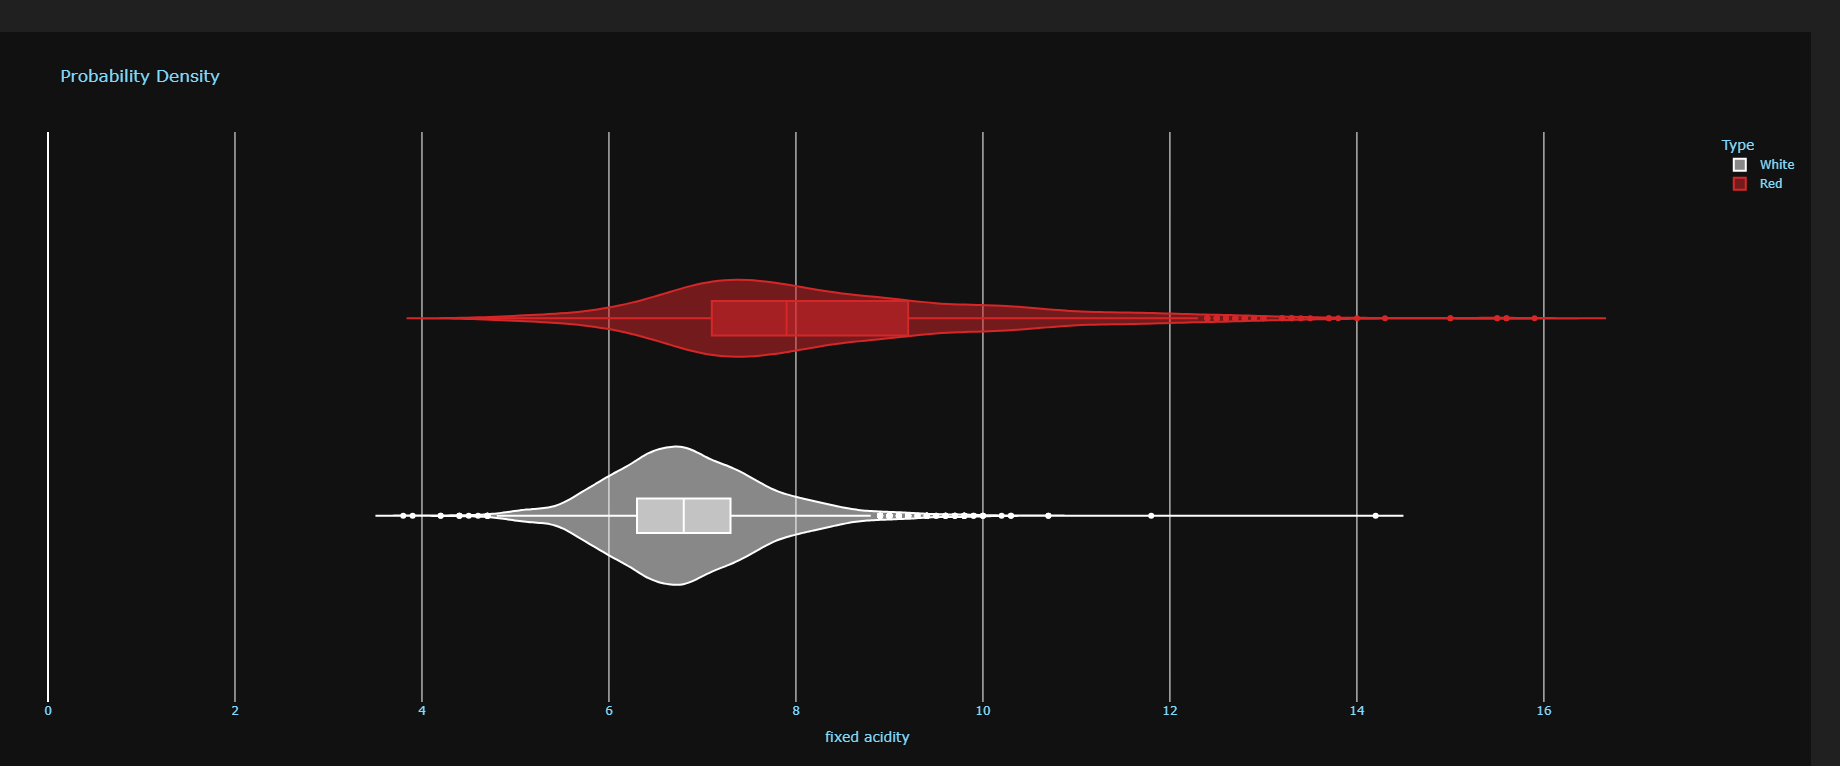


    - Task Two: Scatterplot matrix illustrating relationships between all physical attributes in the dataset.

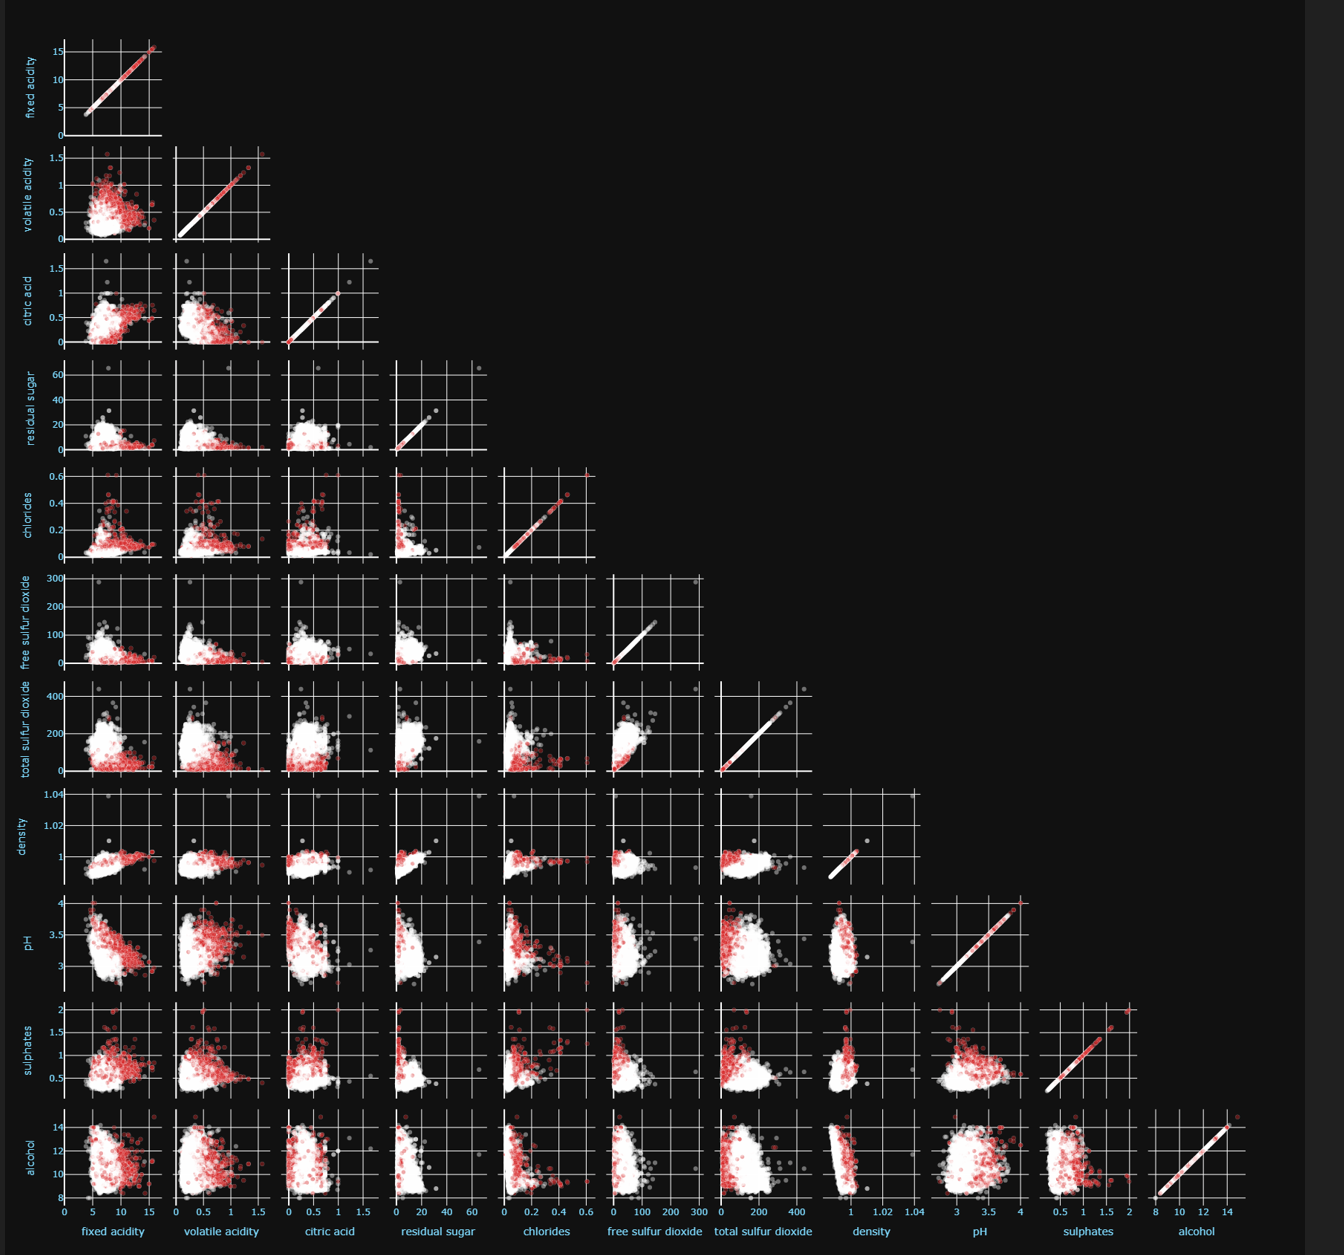



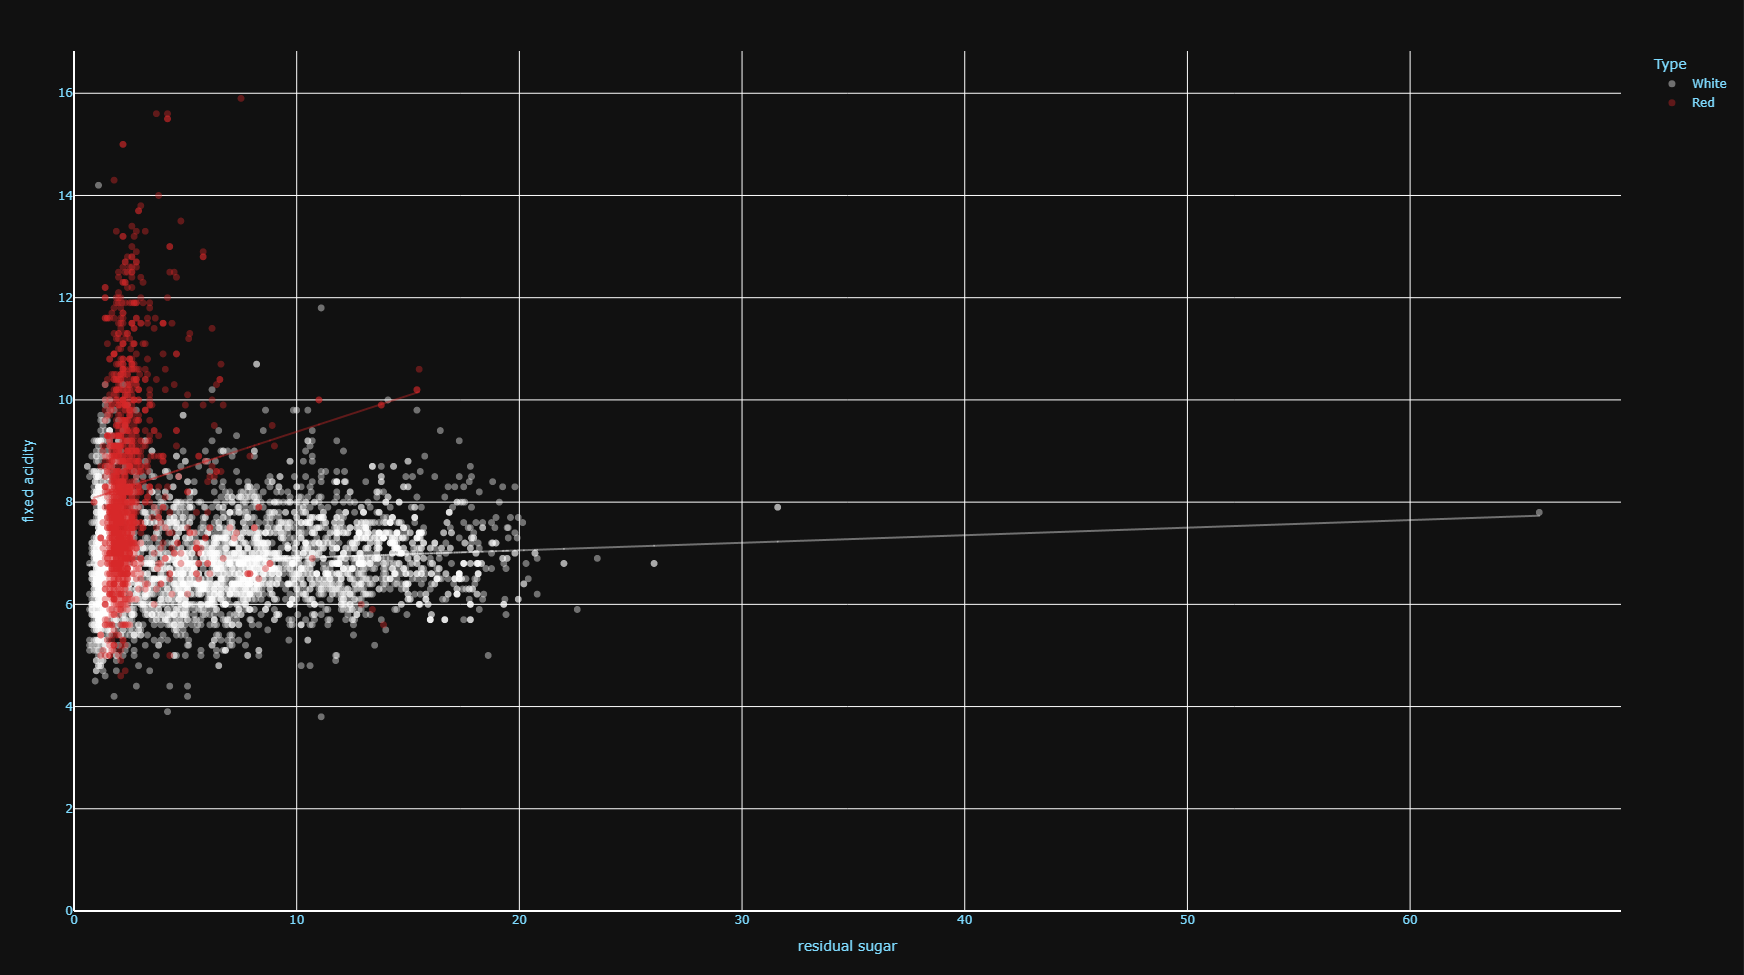


  - Task Three: Scatterplot demonstrating the correlation between alcohol content and wine quality, with a regression line highlighting the trend.

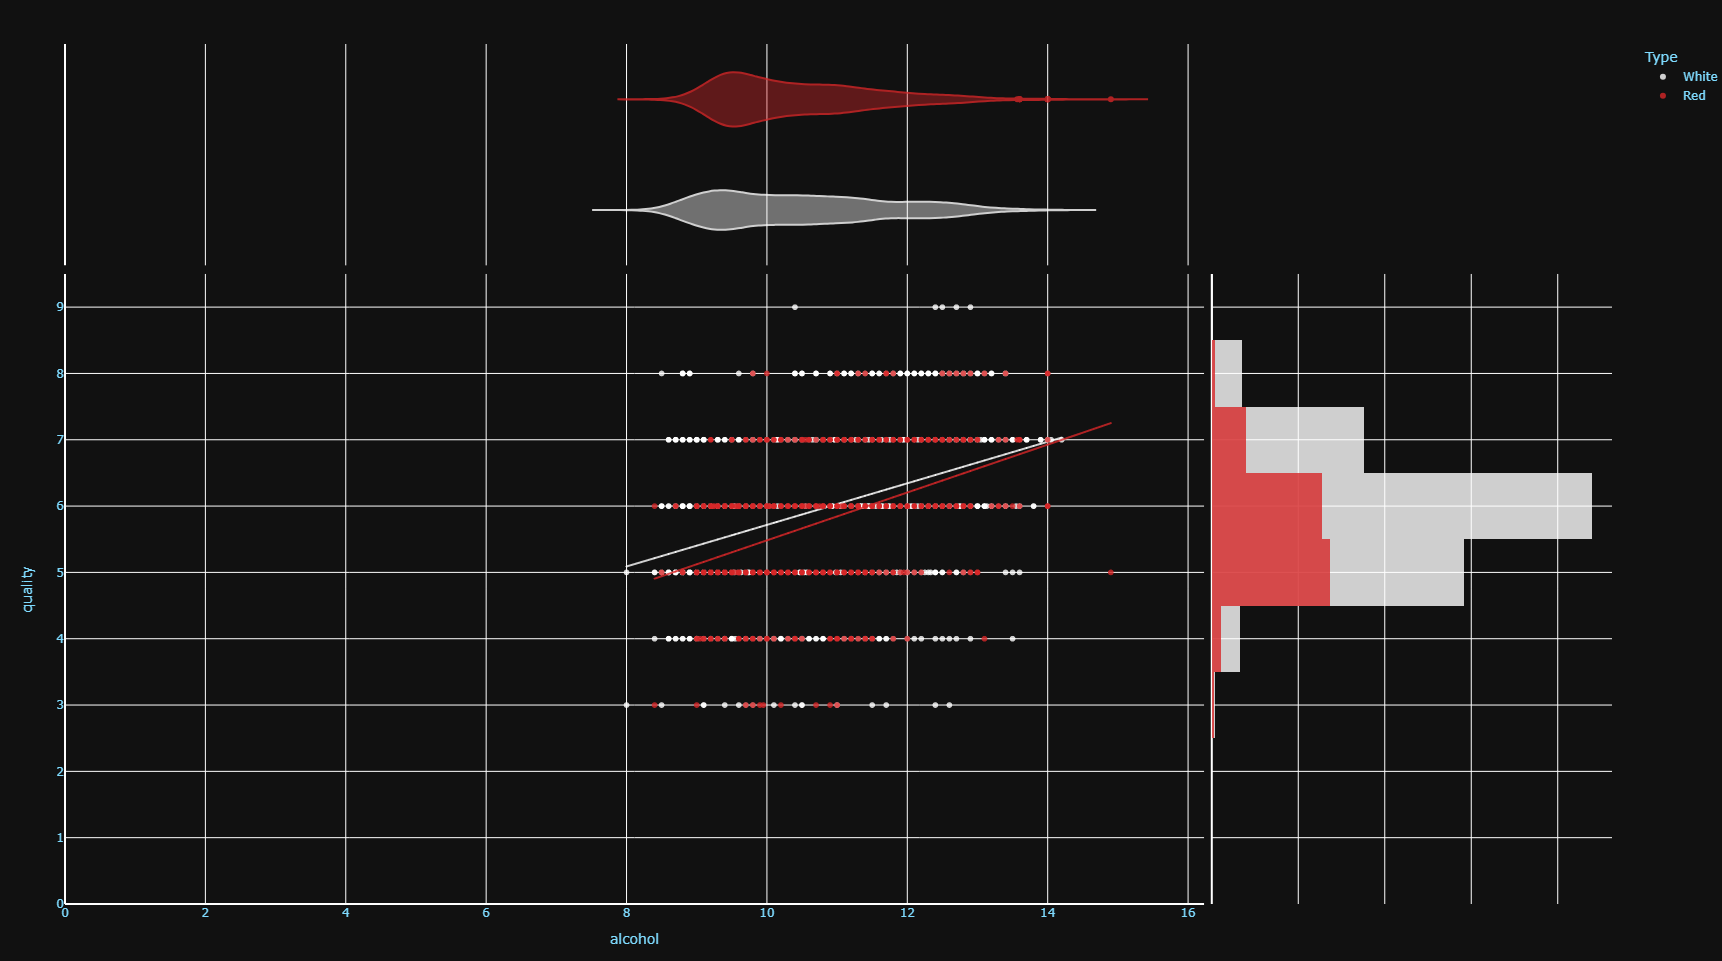



**3) A summary of the key elements of your design and accompanying justification
Interactive Design: The dashboard emphasizes user interactivity through dropdowns, allowing users to customize the visualizations. This flexibility makes it easier to explore specific relationships between attributes.**

Key Visualizations:

  - Violin Plots and Histograms: Used in Task One to show the distribution of each wine attribute. Violin plots highlight the density of data points across different wine types.

  - Scatterplot Matrix: Provides a holistic view of the relationships between multiple wine attributes, allowing users to spot patterns and correlations.

  - Scatterplots with Regression Lines: Task Three employs scatterplots with regression models to help users explore the effect of physical attributes on wine quality, supported by violin and histogram plots.

Justification: The choice of visualizations aligns with the goal of helping users understand the data intuitively. For example, violin plots provide a more detailed view of attribute distributions compared to basic histograms, while scatterplots with regression lines clearly show trends between attributes and quality.

**4) A discussion of your final evaluation approach, including the procedure, people recruited, and results. Note that, due to the difficulty of recruiting experts, you can use colleagues, friends, classmates, or family to evaluate your designs if experts or others from your target population are unavailable.
For evaluation, I have contacted five individuals — 3 colleagues from my previous role in manufacturing and 2 family members. They were asked to complete a series of tasks, such as comparing the acidity of red and white wines or identifying relationships between alcohol content and wine quality. My focus was on evaluating the dashboard’s usability, visual clarity and the ability to extract meaningful insights.**

Results:

   - Positive Feedback: If I conclude all users result, they have appreciated the interactive features and found the ability to filter and select specific attributes particularly useful. The scatterplot matrix in Task Two was praised for providing an in-depth view of attribute correlations.

   - Areas for Improvement: Some users (my family members :)) found the scatterplot matrix a bit overwhelming initially due to the number of variables displayed. Suggestions included providing more instructions or allowing users to customize which variables are shown.

**5) A synthesis of your findings, including what elements of your approach worked well and what elements you would refine in future iterations.**

what elements of your approach worked well:

  - Interactivity: The use of dropdowns and filters was well-received, giving users control over the data they wished to explore. It allowed them to focus on specific questions or hypotheses about the wine attributes and their effects on quality.

  - Visualization Clarity: The use of contrasting colors to differentiate between red and white wines helped users quickly understand the data distributions and trends. Regression lines in Task Three offered a clear visualization of how attributes like alcohol content correlate with wine quality. What Could Be Refined:


  - Simplifying the Layout: Based on user feedback, the scatterplot matrix could benefit from a more simplified layout. Allowing users to select fewer variables at a time or customize their view could reduce complexity. Performance Optimization: While the dashboard performed well for this dataset, future iterations could focus on optimizing the performance, particularly when handling larger datasets or more complex visualizations.

what elements you would refine in future iterations:

I would focus on improving the layout to simplify the user experience and optimizing performance for larger datasets, ensuring the dashboard remains both intuitive and responsive.



My project GitHub link: https://github.com/SmitaM91/Fundamentals-of-Data-Visualization---Final-Project/blob/main/README.md


Thank you so much for reviewing my project.

